In [5]:
!pip3 install numpy
!pip3 install pandas


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [7]:
csv_list = []
for dirname, _, filenames in os.walk('./Cyclist_dataset'):
    for filename in filenames:
        csv_file = os.path.join(dirname,filename)
        raw_csv_data = pd.read_csv(csv_file)
        csv_list.append(raw_csv_data)

# raw_csv_data = pd.read_csv('Cyclist_dataset/.csv')

# df = raw_csv_data.copy()

# df.head()

In [8]:
print(csv_list)

[                 ride_id  rideable_type           started_at  \
0       BD0A6FF6FFF9B921  electric_bike  2020-11-01 13:36:00   
1       96A7A7A4BDE4F82D  electric_bike  2020-11-01 10:03:26   
2       C61526D06582BDC5  electric_bike  2020-11-01 00:34:05   
3       E533E89C32080B9E  electric_bike  2020-11-01 00:45:16   
4       1C9F4EF18C168C60  electric_bike  2020-11-01 15:43:25   
...                  ...            ...                  ...   
259711  A9FA0D0987E7622B    docked_bike  2020-11-20 17:09:08   
259712  4C5FE357D0F8F9B2    docked_bike  2020-11-02 18:53:59   
259713  46867105425F25E3    docked_bike  2020-11-07 19:05:03   
259714  2830FAF63F52A386    docked_bike  2020-11-08 11:47:53   
259715  1F63CF7D89D892BF    docked_bike  2020-11-07 11:44:43   

                   ended_at           start_station_name  start_station_id  \
0       2020-11-01 13:45:40        Dearborn St & Erie St             110.0   
1       2020-11-01 10:14:45    Franklin St & Illinois St             672.0

In [9]:
df_merged = pd.concat(csv_list)
df_merged.to_csv("Cyclistic_dataset_2022.csv")

In [10]:
df_merged=df_merged.drop_duplicates()
df_merged.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3541683 entries, 0 to 388652
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             3541683 non-null  object 
 1   rideable_type       3541683 non-null  object 
 2   started_at          3541683 non-null  object 
 3   ended_at            3541683 non-null  object 
 4   start_station_name  3447027 non-null  object 
 5   start_station_id    3446401 non-null  object 
 6   end_station_name    3430802 non-null  object 
 7   end_station_id      3430341 non-null  object 
 8   start_lat           3541683 non-null  float64
 9   start_lng           3541683 non-null  float64
 10  end_lat             3537428 non-null  float64
 11  end_lng             3537428 non-null  float64
 12  member_casual       3541683 non-null  object 
dtypes: float64(4), object(9)
memory usage: 378.3+ MB


In [11]:
df_merged['started_at'] = pd.to_datetime(df_merged['started_at'], format='%Y-%m-%d %H:%M:%S')
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df_merged.isnull().sum()
print(df_merged.iloc[622361])

ride_id                     EF7884A48F82376B
rideable_type                    docked_bike
started_at               2020-02-13 12:12:25
ended_at                 2020-02-13 12:14:52
start_station_name    Canal St & Harrison St
start_station_id                         169
end_station_name        Canal St & Taylor St
end_station_id                         414.0
start_lat                            41.8743
start_lng                           -87.6396
end_lat                              41.8703
end_lng                             -87.6395
member_casual                         member
Name: 231072, dtype: object


In [13]:
# from datetime import datetime

ride_duration = []

for i in range(df_merged.shape[0]):
    ride_duration.append(df_merged.iloc[i]['ended_at'] - df_merged.iloc[i]['started_at'])
    
df_merged['ride_duration'] = ride_duration


# df.head()

In [14]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27


In [21]:
started_month = []
ended_month = []
started_weekday = []
ended_weekday = []
started_hour = []
ended_hour=[]


for i in range(df_merged.shape[0]):
    started_month.append(df_merged.iloc[i]['started_at'].month)
    ended_month.append(df_merged.iloc[i]['ended_at'].month)
    started_weekday.append(df_merged.iloc[i]['started_at'].weekday())
    ended_weekday.append(df_merged.iloc[i]['ended_at'].weekday())
    started_hour.append(df_merged.iloc[i]['started_at'].hour)
    ended_hour.append(df_merged.iloc[i]['ended_at'].hour)
    
# df_merged['started_month'] = started_month
# df_merged['ended_month'] = ended_month

In [19]:
print(ended_month)

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [28]:
!pip3 install matplotlib
import matplotlib 
import matplotlib.colors as mcolors


                counts  percent
member_casual                  
member         2175108     61.4
casual         1366575     38.6


array([<Axes: ylabel='counts'>], dtype=object)

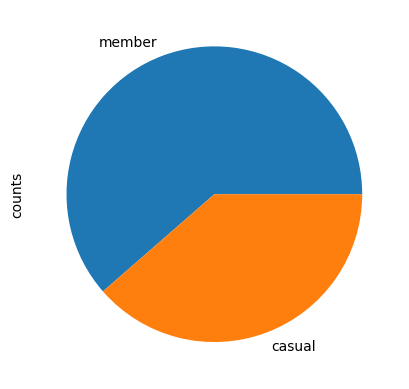

In [37]:
m = df_merged['member_casual']
m_counts = m.value_counts()
m_percent = m.value_counts(normalize=True).mul(100).round(1)
membership = pd.DataFrame({'counts': m_counts, 'percent': m_percent})

print(membership)
membership["counts"].plot.pie(subplots=True)